<a href="https://colab.research.google.com/github/als1379/Statistical-and-Mathematical-Methods-for-Artificial-Intelligence/blob/main/HW2/HW_2_Visualizing_dyad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualizing dyad

## Import image and make it grayscale

array([[[154, 147, 151],
        [109, 103, 124],
        [ 63,  58, 102],
        ...,
        [127, 120, 115],
        [120, 117, 106],
        [125, 119, 110]],

       [[177, 171, 171],
        [144, 141, 143],
        [113, 114, 124],
        ...,
        [127, 118, 112],
        [124, 115, 108],
        [121, 116, 105]],

       [[201, 194, 193],
        [182, 178, 175],
        [168, 165, 164],
        ...,
        [128, 120, 117],
        [126, 116, 112],
        [124, 114, 109]],

       ...,

       [[186, 170, 176],
        [186, 170, 177],
        [183, 168, 170],
        ...,
        [  0,   0,   0],
        [  0,   0,   1],
        [  0,   0,   0]],

       [[183, 169, 170],
        [182, 167, 171],
        [185, 164, 176],
        ...,
        [  0,   0,   1],
        [  1,   1,   1],
        [  0,   0,   0]],

       [[184, 167, 172],
        [183, 165, 169],
        [180, 162, 171],
        ...,
        [  0,   0,   0],
        [  1,   1,   1],
        [  0,   0,   0]]], dtype=uint8)
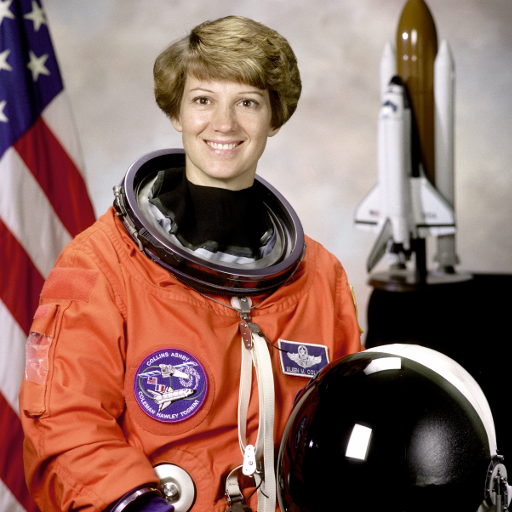

In [ ]:
import skimage as ski

image = ski.data.astronaut()
image

array([[149, 107,  64, ..., 121, 116, 119],
       [172, 142, 114, ..., 119, 116, 116],
       [195, 178, 165, ..., 122, 118, 116],
       ...,
       [175, 175, 172, ...,   0,   0,   0],
       [173, 171, 171, ...,   0,   0,   0],
       [172, 170, 168, ...,   0,   0,   0]], dtype=uint8)
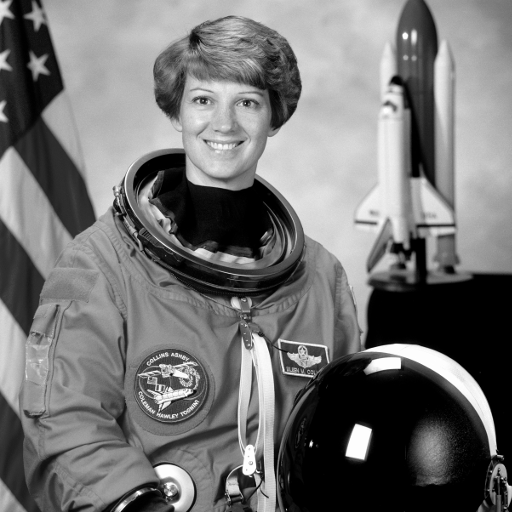

In [ ]:
gray_image_array = np.dot(image[..., :3], [0.2989, 0.5870, 0.1140]).astype(np.uint8)

gray_image_array

In [ ]:
print(gray_image_array.shape)

(512, 512)


## Compute SVD

In [ ]:
import numpy as np

U, S, Vh = np.linalg.svd(gray_image_array)

In [ ]:
print(U.shape)
print(S.shape)
print(Vh.shape)

(512, 512)
(512,)
(512, 512)


In [ ]:
np.allclose(gray_image_array, np.dot(U[:, :] * S, Vh))

True

## Visualize some of the dyad

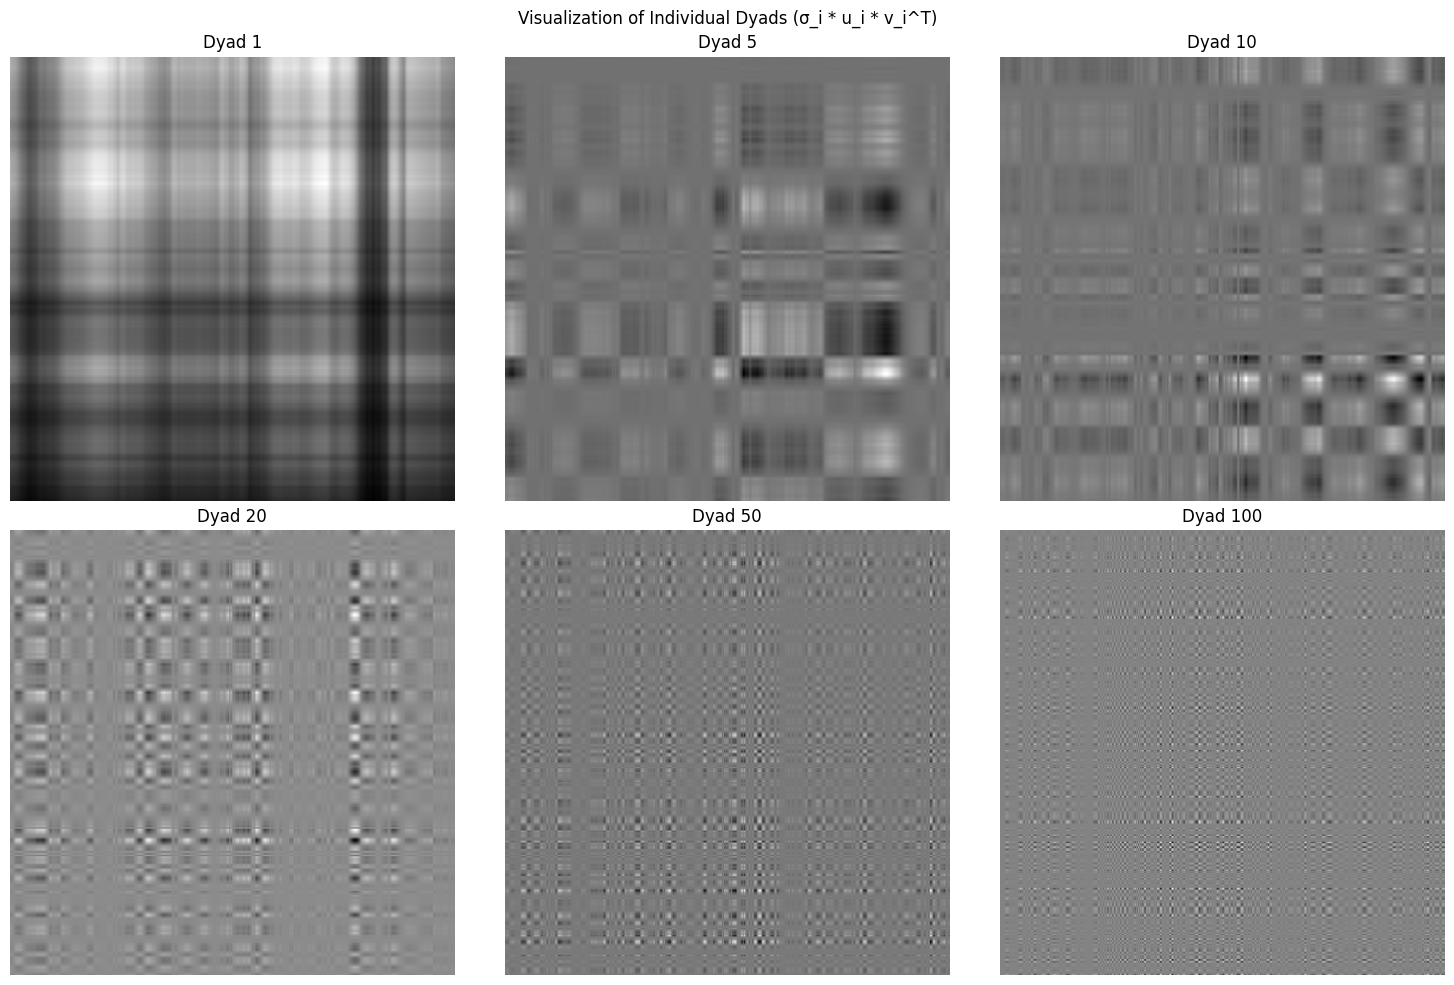

In [ ]:
from matplotlib import pyplot as plt

# Visualize individual dyads (sigma_i * u_i * v_i^T)
dyad_indices = [1, 5, 10, 20, 50, 100]
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.ravel()

for i, index in enumerate(dyad_indices):
    # Compute the dyad
    dyad = S[index - 1] * np.outer(U[:, index - 1], Vh[index - 1, :])

    # Display the individual dyad
    axs[i].imshow(dyad, cmap='gray')
    axs[i].set_title(f"Dyad {index}")
    axs[i].axis('off')

plt.suptitle("Visualization of Individual Dyads (\u03C3_i * u_i * v_i^T)")
plt.tight_layout()
plt.show()


The first dyads capture broader, more general information, while the later dyads focus on finer details. For example, dyad 100 contains a lot of intricate details, whereas dyad 1 lacks any significant detail and primarily represents large-scale structures.

## Plot the singular values

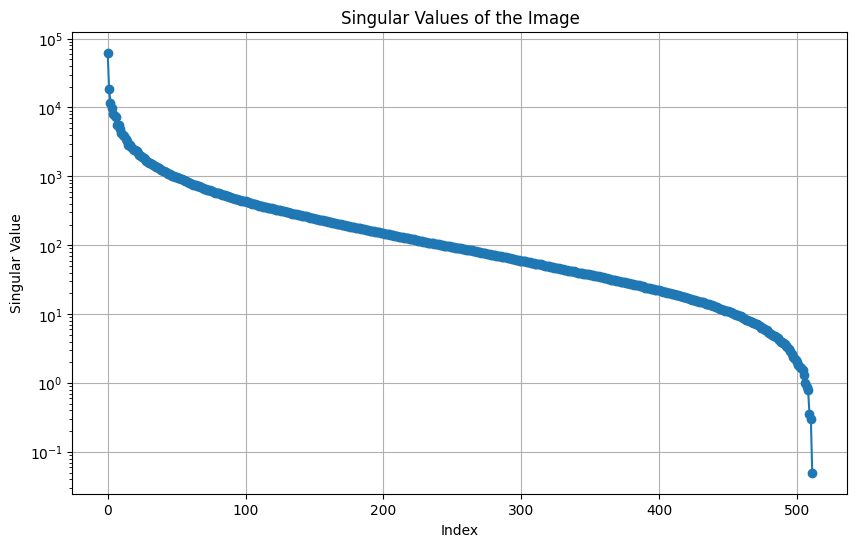

In [ ]:
# Plot the singular values
plt.figure(figsize=(10, 6))
plt.plot(S, marker='o')
plt.title("Singular Values of the Image")
plt.xlabel("Index")
plt.ylabel("Singular Value")
plt.yscale('log')  # Use a logarithmic scale for better visualization of the decay
plt.grid(True)
plt.show()


This observation shows that lower singular value means more details and higher sigular value means general information

## Visualize the k-rank approximation of X


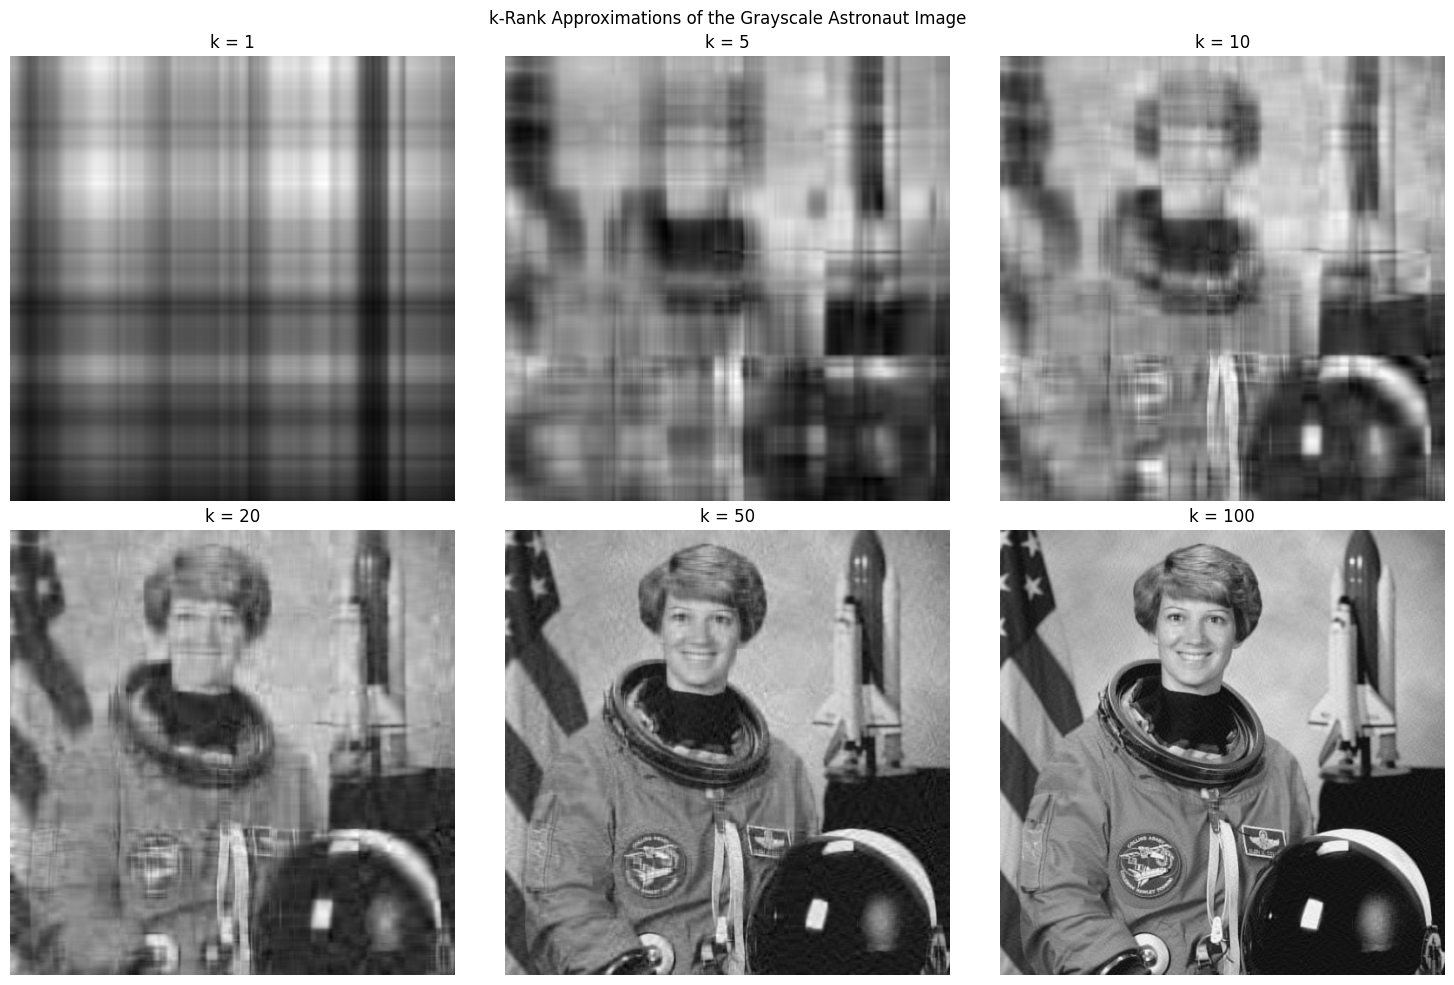

In [ ]:
# Reconstruct the grayscale astronaut image using different k-rank approximations
k_values = [1, 5, 10, 20, 50, 100]
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.ravel()

for i, k in enumerate(k_values):
    # Reconstruct the image using the first k singular values/vectors
    S_k = np.diag(S[:k])
    reconstruction_k = U[:, :k] @ S_k @ Vh[:k, :]

    # Display the reconstruction
    axs[i].imshow(reconstruction_k, cmap='gray')
    axs[i].set_title(f"k = {k}")
    axs[i].axis('off')

plt.suptitle("k-Rank Approximations of the Grayscale Astronaut Image")
plt.tight_layout()
plt.show()


By increasing k, we will add more details to images, the details are in dyads with higher i, as we saw in the singular value plot and visualizing dyads.

## Compute and plot the approximation error

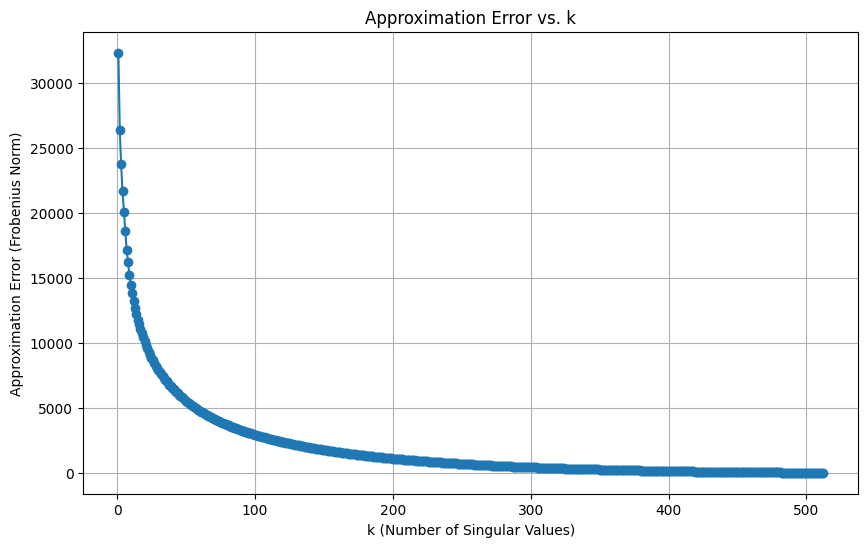

In [ ]:
# Compute and plot the approximation error for increasing values of k
errors = []
k_values = range(1, len(gray_image_array) + 1)

# Compute errors for each k
for k in k_values:
    S_k = np.diag(S[:k])
    X_k = U[:, :k] @ S_k @ Vh[:k, :]
    error = np.linalg.norm(gray_image_array - X_k, 'fro')  # Frobenius norm of the error
    errors.append(error)

# Plot the approximation error
plt.figure(figsize=(10, 6))
plt.plot(k_values, errors, marker='o')
plt.title("Approximation Error vs. k")
plt.xlabel("k (Number of Singular Values)")
plt.ylabel("Approximation Error (Frobenius Norm)")
plt.grid(True)
plt.show()


## Plot the compression factor and compute zero compression factor k

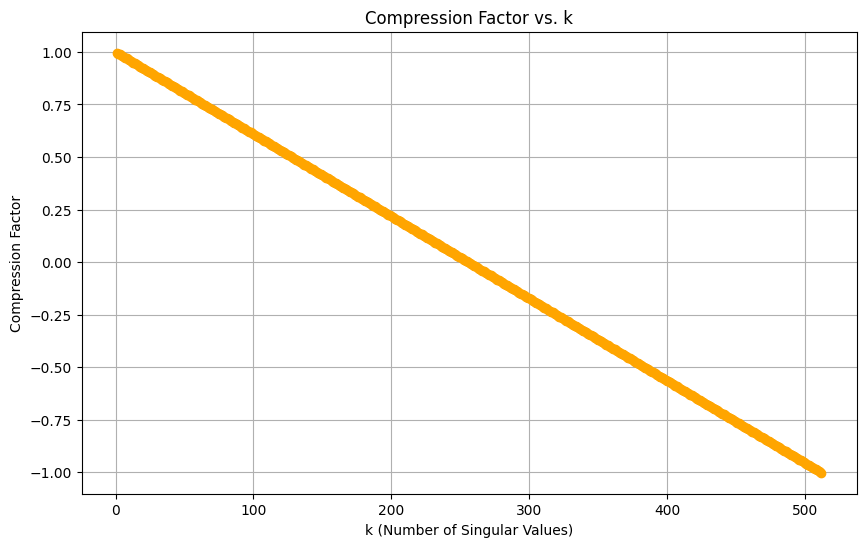

In [ ]:
# Dimensions of the grayscale image
m, n = gray_image_array.shape

# Compute the compression factor for increasing values of k
compression_factors = []
k_values = range(1, len(S) + 1)

zero_compression_factor = None
for k in k_values:
    c_k = 1 - (k * (m + n + 1)) / (m * n)
    compression_factors.append(c_k)
    if c_k <=0 and zero_compression_factor is None:
      zero_compression_factor = k

# Plot the compression factor
plt.figure(figsize=(10, 6))
plt.plot(k_values, compression_factors, marker='o', color='orange')
plt.title("Compression Factor vs. k")
plt.xlabel("k (Number of Singular Values)")
plt.ylabel("Compression Factor")
plt.grid(True)
plt.show()


In [ ]:
zero_compression_factor

256

## computing error for zero compression factor k

In [ ]:
S_k = np.diag(S[:zero_compression_factor])
X_k = U[:, :zero_compression_factor] @ S_k @ Vh[:zero_compression_factor, :]
error = np.linalg.norm(gray_image_array - X_k, 'fro')  # Frobenius norm of the error
error

650.3333400467675

We expect minimal error